In [82]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
from matplotlib.legend_handler import HandlerTuple
import IPython
import imgkit
import matplotlib.image as mpimg

# Zero shear viscosity

Below showing you the example of analyzed flow curves

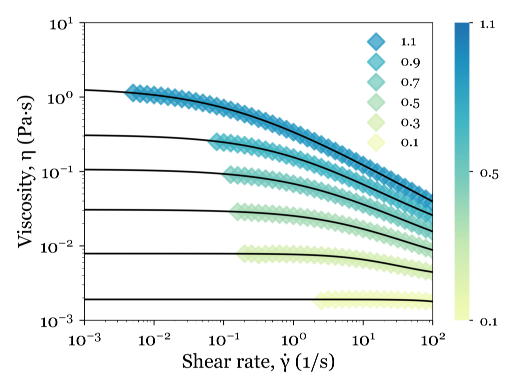

In [83]:
# Load the image (replace 'image.png' with your image file path)
image = mpimg.imread('/Users/ningravi/Desktop/Python/Rheology Plots/RheologyOfNeatCNF/Flow behaviors of Neat CNF suspensions fit.png')

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels and ticks
plt.show()

In [84]:
P2VP_10k = '/Users/ningravi/Desktop/Python/P2VP/20230912-selected/P2Vp_10K_09112023 (2).xls'
P2VP_40k = '/Users/ningravi/Desktop/Python/P2VP/20230912-selected/40K P2VP_10032023 (1).xls'
P2VP_250k = '/Users/ningravi/Desktop/Python/P2VP/20230912-selected/250k_P2VP_20230920.xls'
P2VP_400k = '/Users/ningravi/Desktop/Python/P2VP/20230912-selected/P2Vp_400K_09112023.xls'
P2VP_1p2M = '/Users/ningravi/Desktop/Python/P2VP/20230912-selected/1.2M_P2VP_20230920 (1).xls'

start_row_01 = 20
end_row_01 = 43

P2VP_10k_shear = pd.read_excel(P2VP_10k, sheet_name='Sweep - 1', usecols=[3], nrows=end_row_01 - start_row_01 + 1, skiprows=range(1, start_row_01))
P2VP_10k_vis = pd.read_excel(P2VP_10k , sheet_name='Sweep - 1', usecols=[4], nrows=end_row_01 - start_row_01 + 1, skiprows=range(1, start_row_01))
P2VP_10k_stress = pd.read_excel(P2VP_10k , sheet_name='Sweep - 1', usecols=[2], nrows=end_row_01 - start_row_01 + 1, skiprows=range(1, start_row_01))

start_row_02 = 32
end_row_02 = 53

P2VP_40k_shear = pd.read_excel(P2VP_40k, sheet_name='Sweep - 1', usecols=[3], nrows=end_row_02 - start_row_02 + 1, skiprows=range(1, start_row_02))
P2VP_40k_vis = pd.read_excel(P2VP_40k, sheet_name='Sweep - 1', usecols=[4], nrows=end_row_02 - start_row_02 + 1, skiprows=range(1, start_row_02))
P2VP_40k_stress = pd.read_excel(P2VP_40k, sheet_name='Sweep - 1', usecols=[2], nrows=end_row_02 - start_row_02 + 1, skiprows=range(1, start_row_02))

start_row_03 = 5
end_row_03 = 43

P2VP_250k_shear = pd.read_excel(P2VP_250k, sheet_name='Sweep - 1', usecols=[3], nrows=end_row_03 - start_row_03 + 1, skiprows=range(1, start_row_03))
P2VP_250k_vis = pd.read_excel(P2VP_250k, sheet_name='Sweep - 1', usecols=[4], nrows=end_row_03 - start_row_03 + 1, skiprows=range(1, start_row_03))
P2VP_250k_stress = pd.read_excel(P2VP_250k, sheet_name='Sweep - 1', usecols=[2], nrows=end_row_03 - start_row_03 + 1, skiprows=range(1, start_row_03))

start_row_04 = 5
end_row_04 = 43

P2VP_400k_shear = pd.read_excel(P2VP_400k, sheet_name='Sweep - 2', usecols=[3], nrows=end_row_04 - start_row_04 + 1, skiprows=range(1, start_row_04))
P2VP_400k_vis = pd.read_excel(P2VP_400k, sheet_name='Sweep - 2', usecols=[4], nrows=end_row_04 - start_row_04 + 1, skiprows=range(1, start_row_04))
P2VP_400k_stress = pd.read_excel(P2VP_400k, sheet_name='Sweep - 2', usecols=[2], nrows=end_row_04 - start_row_04 + 1, skiprows=range(1, start_row_04))

start_row_05 = 5
end_row_05 = 43

P2VP_1p2M_shear = pd.read_excel(P2VP_1p2M, sheet_name='Sweep - 1', usecols=[3], nrows=end_row_05 - start_row_05 + 1, skiprows=range(1, start_row_05))
P2VP_1p2M_vis = pd.read_excel(P2VP_1p2M, sheet_name='Sweep - 1', usecols=[4], nrows=end_row_05 - start_row_05 + 1, skiprows=range(1, start_row_05))
P2VP_1p2M_stress = pd.read_excel(P2VP_1p2M, sheet_name='Sweep - 1', usecols=[2], nrows=end_row_05 - start_row_05 + 1, skiprows=range(1, start_row_05))


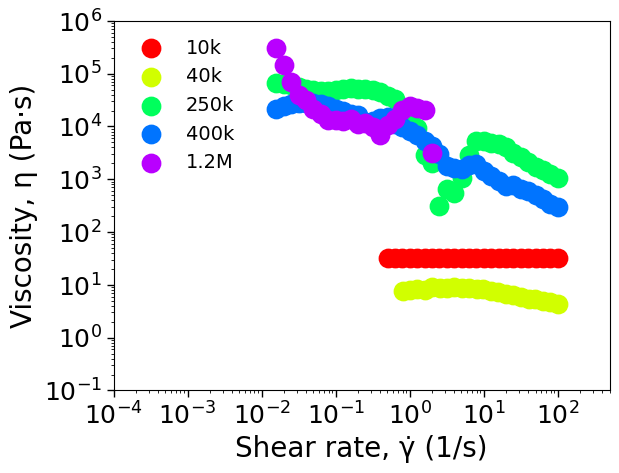

In [85]:
shear_rate_P2VP = [P2VP_10k_shear, P2VP_40k_shear, P2VP_250k_shear, P2VP_400k_shear, P2VP_1p2M_shear]
viscosity_P2VP = [P2VP_10k_vis, P2VP_40k_vis, P2VP_250k_vis, P2VP_400k_vis, P2VP_1p2M_vis]
label_name_P2VP = ['10k', '40k', '250k', '400k', '1.2M']

cmap = plt.cm.get_cmap('hsv') 

for idx, (x, y, label) in enumerate(zip(shear_rate_P2VP, viscosity_P2VP, label_name_P2VP)):
    c = cmap(idx / len(shear_rate_P2VP))
    scatter1 = plt.scatter(x, y, c=np.atleast_2d(c), s=150,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label)
  
plt.style.use('fast')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear rate, γ̇ (1/s)", fontsize=20)
plt.ylabel("Viscosity, η (Pa·s)", fontsize=20)  


plt.legend(frameon = False, fontsize = 14)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.0001, 500)
plt.ylim(0.1, 1000000)
#plt.savefig("Flow behaviors of P2VP.png", dpi=1500, bbox_inches='tight')
plt.show()

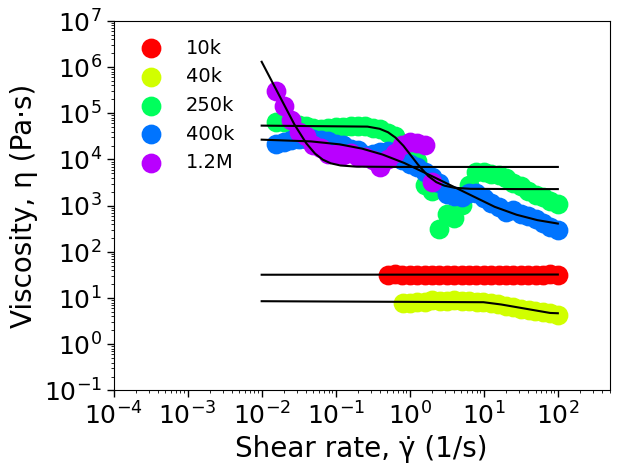

     MW         eta_o
0   10k  3.193719e+01
1   40k  8.540511e+00
2  250k  5.395560e+04
3  400k  2.745034e+04
4  1.2M  2.123016e+10


In [86]:
def eta(gdot, eta_0, eta_inf, lamb, n):
    with np.errstate(invalid='ignore'):  # Ignore invalid values encountered in power operation
        return eta_inf + ((eta_0 - eta_inf) / (1 + (lamb * gdot) ** n))
P2VP_10k_shear_x = np.array(P2VP_10k_shear)
P2VP_10k_vis_x = np.array(P2VP_10k_vis)
P2VP_10k_shear_flat = np.ravel(P2VP_10k_shear_x)
P2VP_10k_vis_flat = np.ravel(P2VP_10k_vis_x)

P2VP_40k_shear_x = np.array(P2VP_40k_shear)
P2VP_40k_vis_x = np.array(P2VP_40k_vis)
P2VP_40k_shear_flat = np.ravel(P2VP_40k_shear_x)
P2VP_40k_vis_flat = np.ravel(P2VP_40k_vis_x)

P2VP_250k_shear_x = np.array(P2VP_250k_shear)
P2VP_250k_vis_x = np.array(P2VP_250k_vis)
P2VP_250k_shear_flat = np.ravel(P2VP_250k_shear_x)
P2VP_250k_vis_flat = np.ravel(P2VP_250k_vis_x)

P2VP_400k_shear_x = np.array(P2VP_400k_shear)
P2VP_400k_vis_x = np.array(P2VP_400k_vis)
P2VP_400k_shear_flat = np.ravel(P2VP_400k_shear_x)
P2VP_400k_vis_flat = np.ravel(P2VP_400k_vis_x)

P2VP_1p2M_shear_x = np.array(P2VP_1p2M_shear)
P2VP_1p2M_vis_x = np.array(P2VP_1p2M_vis)
P2VP_1p2M_shear_flat = np.ravel(P2VP_1p2M_shear_x)
P2VP_1p2M_vis_flat = np.ravel(P2VP_1p2M_vis_x)

p0 = [30, 10, 1, 1]

params_P2VP_10k, cov_P2VP_10k = curve_fit(eta, P2VP_10k_shear_flat, P2VP_10k_vis_flat, p0, maxfev=100000)
eta_0_fit_P2VP_10k, eta_inf_fit_P2VP_10k, lamb_fit_P2VP_10k, n_fit_P2VP_10k = params_P2VP_10k

shear_fit_P2VP_10k = np.logspace(-2, 2, 1000)
vis_fit_P2VP_10k = eta(shear_fit_P2VP_10k, eta_0_fit_P2VP_10k, eta_inf_fit_P2VP_10k, lamb_fit_P2VP_10k, n_fit_P2VP_10k)

params_P2VP_40k, cov_P2VP_40k = curve_fit(eta, P2VP_40k_shear_flat, P2VP_40k_vis_flat, p0, maxfev=100000)
eta_0_fit_P2VP_40k, eta_inf_fit_P2VP_40k, lamb_fit_P2VP_40k, n_fit_P2VP_40k = params_P2VP_40k

shear_fit_P2VP_40k = np.logspace(-2, 2, 1000)
vis_fit_P2VP_40k = eta(shear_fit_P2VP_40k, eta_0_fit_P2VP_40k, eta_inf_fit_P2VP_40k, lamb_fit_P2VP_40k, n_fit_P2VP_40k)

params_P2VP_250k, cov_P2VP_250k = curve_fit(eta, P2VP_250k_shear_flat, P2VP_250k_vis_flat, p0, maxfev=100000)
eta_0_fit_P2VP_250k, eta_inf_fit_P2VP_250k, lamb_fit_P2VP_250k, n_fit_P2VP_250k = params_P2VP_250k

shear_fit_P2VP_250k = np.logspace(-2, 2, 1000)
vis_fit_P2VP_250k = eta(shear_fit_P2VP_250k, eta_0_fit_P2VP_250k, eta_inf_fit_P2VP_250k, lamb_fit_P2VP_250k, n_fit_P2VP_250k)

params_P2VP_400k, cov_P2VP_400k = curve_fit(eta, P2VP_400k_shear_flat, P2VP_400k_vis_flat, p0, maxfev=100000)
eta_0_fit_P2VP_400k, eta_inf_fit_P2VP_400k, lamb_fit_P2VP_400k, n_fit_P2VP_400k = params_P2VP_400k

shear_fit_P2VP_400k = np.logspace(-2, 2, 1000)
vis_fit_P2VP_400k = eta(shear_fit_P2VP_400k, eta_0_fit_P2VP_400k, eta_inf_fit_P2VP_400k, lamb_fit_P2VP_400k, n_fit_P2VP_400k)

params_P2VP_1p2M, cov_P2VP_1p2M = curve_fit(eta, P2VP_1p2M_shear_flat, P2VP_1p2M_vis_flat, p0, maxfev=100000)
eta_0_fit_P2VP_1p2M, eta_inf_fit_P2VP_1p2M, lamb_fit_P2VP_1p2M, n_fit_P2VP_1p2M = params_P2VP_1p2M

shear_fit_P2VP_1p2M = np.logspace(-2, 2, 1000)
vis_fit_P2VP_1p2M = eta(shear_fit_P2VP_1p2M, eta_0_fit_P2VP_1p2M, eta_inf_fit_P2VP_1p2M, lamb_fit_P2VP_1p2M, n_fit_P2VP_1p2M)

shear_fit_P2VP = [shear_fit_P2VP_10k, shear_fit_P2VP_40k, shear_fit_P2VP_250k, shear_fit_P2VP_400k, shear_fit_P2VP_1p2M]
vis_fit_P2VP = [vis_fit_P2VP_10k, vis_fit_P2VP_40k, vis_fit_P2VP_250k, vis_fit_P2VP_400k, vis_fit_P2VP_1p2M]

for idx, (x1, y1, x2, y2, label) in enumerate(zip(shear_rate_P2VP, viscosity_P2VP, shear_fit_P2VP, vis_fit_P2VP, label_name_P2VP)):
    c = cmap(idx / len(shear_rate_P2VP))
    scatter1 = plt.scatter(x1, y1, c=np.atleast_2d(c), s=150,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label)
    fitdata = plt.loglog(x2, y2, 'k-')

plt.style.use('fast')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear rate, γ̇ (1/s)", fontsize=20)
plt.ylabel("Viscosity, \u03B7 (Pa\u00B7s)", fontsize=20)  


plt.legend(frameon = False, fontsize = 14)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.0001, 500)
plt.ylim(0.1, 10000000)
#plt.savefig("Flow behaviors of P2VP.png", dpi=1500, bbox_inches='tight')
plt.show()

eta_fit_P2VP = [eta_0_fit_P2VP_10k, eta_0_fit_P2VP_40k, eta_0_fit_P2VP_250k, eta_0_fit_P2VP_400k, eta_0_fit_P2VP_1p2M]
data = {
    'MW': label_name_P2VP,
    'eta_o': eta_fit_P2VP
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

In [99]:
P2VP_40k = '/Users/ningravi/Desktop/Python/P2VP/20230912-selected/40K P2VP_10032023 (1).xls'
P2VP_40k_2 = '/Users/ningravi/Desktop/Python/P2VP/20231103-selected/P2VP_40K_2_20231106.xls'
P2VP_40k_3 = '/Users/ningravi/Desktop/Python/P2VP/20231103-selected/P2VP_40K_20231103 (1).xls'

start_row_02 = 32
end_row_02 = 53

P2VP_40k_shear = pd.read_excel(P2VP_40k, sheet_name='Sweep - 1', usecols=[3], nrows=end_row_02 - start_row_02 + 1, skiprows=range(1, start_row_02))
P2VP_40k_vis = pd.read_excel(P2VP_40k, sheet_name='Sweep - 1', usecols=[4], nrows=end_row_02 - start_row_02 + 1, skiprows=range(1, start_row_02))
P2VP_40k_stress = pd.read_excel(P2VP_40k, sheet_name='Sweep - 1', usecols=[2], nrows=end_row_02 - start_row_02 + 1, skiprows=range(1, start_row_02))

start_row_02_2 = 12
end_row_02_2 = 53

P2VP_40k_shear_2 = pd.read_excel(P2VP_40k_2, sheet_name='Sweep - 1', usecols=[3], nrows=end_row_02_2 - start_row_02_2 + 1, skiprows=range(1, start_row_02_2))
P2VP_40k_vis_2 = pd.read_excel(P2VP_40k_2, sheet_name='Sweep - 1', usecols=[4], nrows=end_row_02_2 - start_row_02_2 + 1, skiprows=range(1, start_row_02_2))
P2VP_40k_stress_2 = pd.read_excel(P2VP_40k_2, sheet_name='Sweep - 1', usecols=[2], nrows=end_row_02_2 - start_row_02_2 + 1, skiprows=range(1, start_row_02_2))

start_row_02_3 = 18
end_row_02_3 = 53

P2VP_40k_shear_3 = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 1', usecols=[3], nrows=end_row_02_3 - start_row_02_3 + 1, skiprows=range(1, start_row_02_3))
P2VP_40k_vis_3 = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 1', usecols=[4], nrows=end_row_02_3 - start_row_02_3 + 1, skiprows=range(1, start_row_02_3))
P2VP_40k_stress_3 = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 1', usecols=[2], nrows=end_row_02_3 - start_row_02_3 + 1, skiprows=range(1, start_row_02_3))

start_row_02_3_d = 5
end_row_02_3_d = 38

P2VP_40k_shear_3_d = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 2', usecols=[3], nrows=end_row_02_3_d - start_row_02_3_d + 1, skiprows=range(1, start_row_02_3_d))
P2VP_40k_vis_3_d = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 2', usecols=[4], nrows=end_row_02_3_d - start_row_02_3_d + 1, skiprows=range(1, start_row_02_3_d))
P2VP_40k_stress_3_d = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 2', usecols=[2], nrows=end_row_02_3_d - start_row_02_3_d + 1, skiprows=range(1, start_row_02_3_d))

start_row_02_3_in = 18
end_row_02_3_in = 53

P2VP_40k_shear_3_in = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 1', usecols=[3], nrows=end_row_02_3_in - start_row_02_3_in + 1, skiprows=range(1, start_row_02_3_in))
P2VP_40k_vis_3_in = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 1', usecols=[4], nrows=end_row_02_3_in - start_row_02_3_in + 1, skiprows=range(1, start_row_02_3_in))
P2VP_40k_stress_3_in = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 1', usecols=[2], nrows=end_row_02_3_in - start_row_02_3_in + 1, skiprows=range(1, start_row_02_3_in))



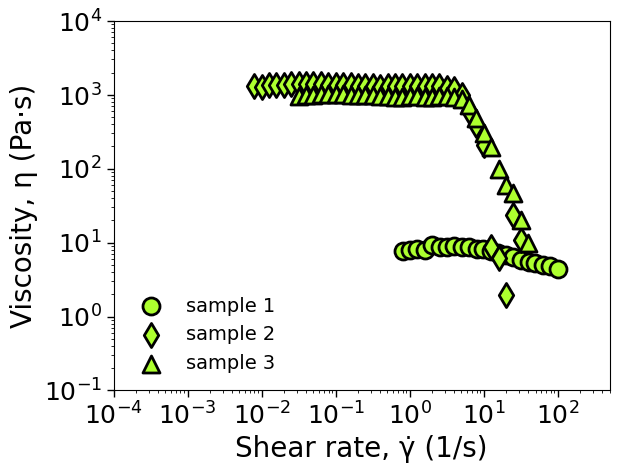

In [94]:
shear_rate_P2VP_40k = [P2VP_40k_shear, P2VP_40k_shear_2, P2VP_40k_shear_3]
viscosity_P2VP_40k = [P2VP_40k_vis, P2VP_40k_vis_2, P2VP_40k_vis_3]
m_40k = ['o', 'd', '^']
label_name_P2VP_40k = ['sample 1', 'sample 2', 'sample 3']

c_40k = 'greenyellow' 

for idx, (x, y, m, label) in enumerate(zip(shear_rate_P2VP_40k, viscosity_P2VP_40k, m_40k, label_name_P2VP_40k)):
    scatter1 = plt.scatter(x, y, s=150, marker=m, facecolors=c_40k, edgecolors='k', linewidths=2, label=label)
  
plt.style.use('fast')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear rate, γ̇ (1/s)", fontsize=20)
plt.ylabel("Viscosity, η (Pa·s)", fontsize=20)  


plt.legend(frameon = False, fontsize = 14)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.0001, 500)
plt.ylim(0.1, 10000)
#plt.savefig("Flow behaviors of P2VP second try.png", dpi=1500, bbox_inches='tight')
plt.show()

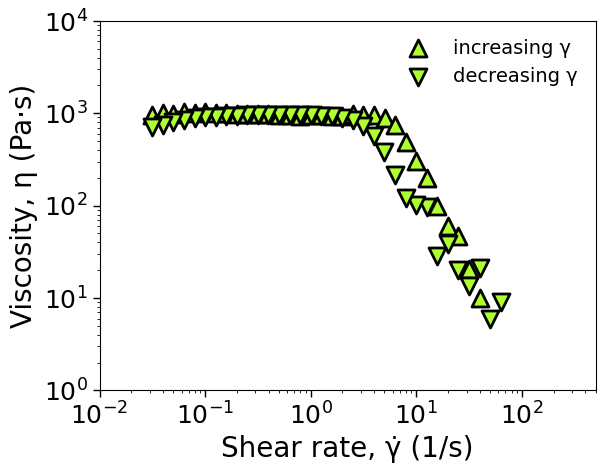

In [95]:
shear_rate_P2VP_40k_3 = [P2VP_40k_shear_3, P2VP_40k_shear_3_d]
viscosity_P2VP_40k_3 = [P2VP_40k_vis_3, P2VP_40k_vis_3_d]
m_40k_3 = ['^', 'v']
label_name_P2VP_40k_3 = ['increasing \u03b3', 'decreasing \u03b3']

c_40k = 'greenyellow' 

for idx, (x, y, m, label) in enumerate(zip(shear_rate_P2VP_40k_3, viscosity_P2VP_40k_3, m_40k_3, label_name_P2VP_40k_3)):
    scatter1 = plt.scatter(x, y, s=150, marker=m, facecolors=c_40k, edgecolors='k', linewidths=2, label=label)
  
plt.style.use('fast')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear rate, γ̇ (1/s)", fontsize=20)
plt.ylabel("Viscosity, η (Pa·s)", fontsize=20)  


plt.legend(frameon = False, fontsize = 14)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.01, 500)
plt.ylim(1, 10000)
#plt.savefig("Flow behaviors of P2VP reversibility.png", dpi=1500, bbox_inches='tight')
plt.show()

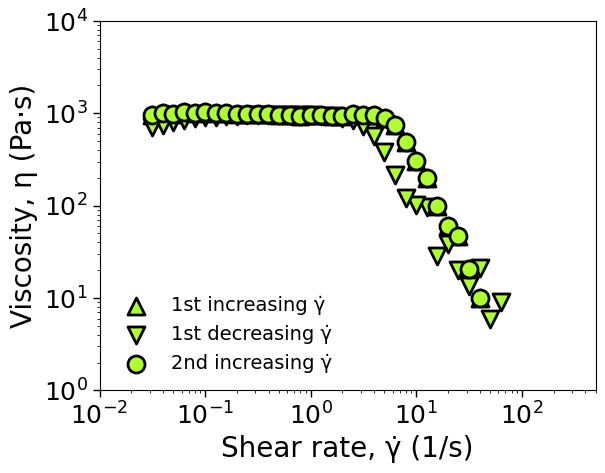

In [104]:
shear_rate_P2VP_40k_3 = [P2VP_40k_shear_3, P2VP_40k_shear_3_d, P2VP_40k_shear_3_in]
viscosity_P2VP_40k_3 = [P2VP_40k_vis_3, P2VP_40k_vis_3_d, P2VP_40k_vis_3_in]
m_40k_3 = ['^', 'v', 'o']
label_name_P2VP_40k_3 = ['1st increasing γ̇ ', '1st decreasing γ̇ ','2nd increasing γ̇ ']

c_40k = 'greenyellow' 

for idx, (x, y, m, label) in enumerate(zip(shear_rate_P2VP_40k_3, viscosity_P2VP_40k_3, m_40k_3, label_name_P2VP_40k_3)):
    scatter1 = plt.scatter(x, y, s=150, marker=m, facecolors=c_40k, edgecolors='k', linewidths=2, label=label)
  
plt.style.use('fast')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear rate, γ̇ (1/s)", fontsize=20)
plt.ylabel("Viscosity, η (Pa·s)", fontsize=20)  


plt.legend(frameon = False, fontsize = 14)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.01, 500)
plt.ylim(1, 10000)
#plt.savefig("Flow behaviors of P2VP reversibility.png", dpi=1500, bbox_inches='tight')
plt.show()

Reverisible without any structural changes

# The 3rd increasing shear rate measurements

In [115]:
start_row_01 = 26
end_row_01 = 43

P2VP_10k_shear = pd.read_excel(P2VP_10k, sheet_name='Sweep - 3', usecols=[3], nrows=end_row_01 - start_row_01 + 1, skiprows=range(1, start_row_01))
P2VP_10k_vis = pd.read_excel(P2VP_10k , sheet_name='Sweep - 3', usecols=[4], nrows=end_row_01 - start_row_01 + 1, skiprows=range(1, start_row_01))
P2VP_10k_stress = pd.read_excel(P2VP_10k , sheet_name='Sweep - 3', usecols=[2], nrows=end_row_01 - start_row_01 + 1, skiprows=range(1, start_row_01))

start_row_02_3_in = 18
end_row_02_3_in = 53

P2VP_40k_shear_3_in = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 1', usecols=[3], nrows=end_row_02_3_in - start_row_02_3_in + 1, skiprows=range(1, start_row_02_3_in))
P2VP_40k_vis_3_in = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 1', usecols=[4], nrows=end_row_02_3_in - start_row_02_3_in + 1, skiprows=range(1, start_row_02_3_in))
P2VP_40k_stress_3_in = pd.read_excel(P2VP_40k_3, sheet_name='Sweep - 1', usecols=[2], nrows=end_row_02_3_in - start_row_02_3_in + 1, skiprows=range(1, start_row_02_3_in))

start_row_03 = 8
end_row_03 = 43

P2VP_250k_shear = pd.read_excel(P2VP_250k, sheet_name='Sweep - 3', usecols=[3], nrows=end_row_03 - start_row_03 + 1, skiprows=range(1, start_row_03))
P2VP_250k_vis = pd.read_excel(P2VP_250k, sheet_name='Sweep - 3', usecols=[4], nrows=end_row_03 - start_row_03 + 1, skiprows=range(1, start_row_03))
P2VP_250k_stress = pd.read_excel(P2VP_250k, sheet_name='Sweep - 3', usecols=[2], nrows=end_row_03 - start_row_03 + 1, skiprows=range(1, start_row_03))

start_row_04 = 8
end_row_04 = 43

P2VP_400k_shear = pd.read_excel(P2VP_400k, sheet_name='Sweep - 2', usecols=[3], nrows=end_row_04 - start_row_04 + 1, skiprows=range(1, start_row_04))
P2VP_400k_vis = pd.read_excel(P2VP_400k, sheet_name='Sweep - 2', usecols=[4], nrows=end_row_04 - start_row_04 + 1, skiprows=range(1, start_row_04))
P2VP_400k_stress = pd.read_excel(P2VP_400k, sheet_name='Sweep - 2', usecols=[2], nrows=end_row_04 - start_row_04 + 1, skiprows=range(1, start_row_04))


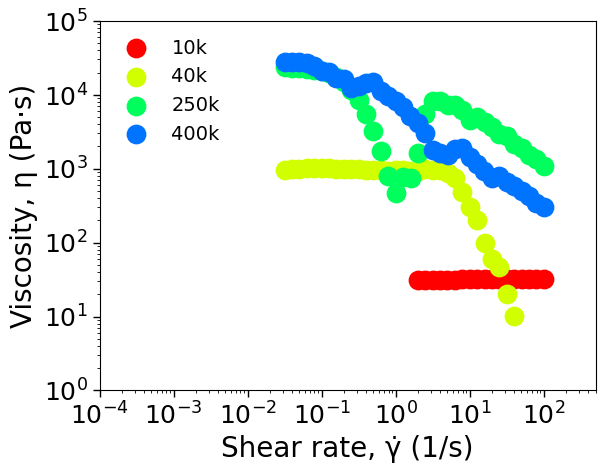

In [116]:
shear_rate_P2VP_2 = [P2VP_10k_shear, P2VP_40k_shear_3, P2VP_250k_shear, P2VP_400k_shear]
viscosity_P2VP_2 = [P2VP_10k_vis, P2VP_40k_vis_3, P2VP_250k_vis, P2VP_400k_vis]
label_name_P2VP_2 = ['10k', '40k', '250k', '400k', '1.2M']

cmap = plt.cm.get_cmap('hsv') 

for idx, (x, y, label) in enumerate(zip(shear_rate_P2VP_2, viscosity_P2VP_2, label_name_P2VP_2)):
    c = cmap(idx / len(shear_rate_P2VP))
    scatter1 = plt.scatter(x, y, c=np.atleast_2d(c), s=150,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label)
  
plt.style.use('fast')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear rate, γ̇ (1/s)", fontsize=20)
plt.ylabel("Viscosity, η (Pa·s)", fontsize=20)  


plt.legend(frameon = False, fontsize = 14)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.0001, 500)
plt.ylim(1, 100000)
#plt.savefig("Flow behaviors of P2VP.png", dpi=1500, bbox_inches='tight')
plt.show()

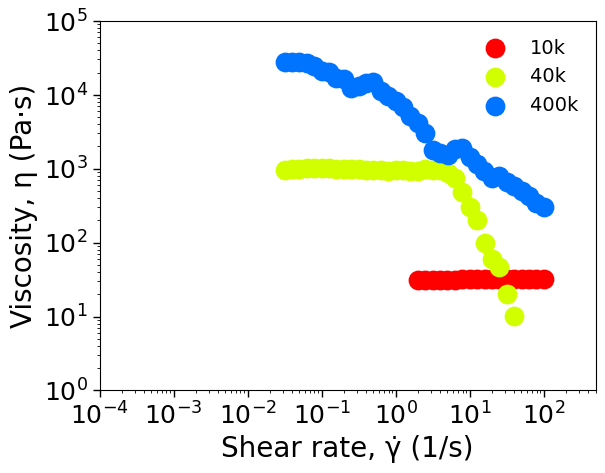

In [117]:
cmap = plt.cm.get_cmap('hsv') 

for idx, (x, y, label) in enumerate(zip(shear_rate_P2VP_2, viscosity_P2VP_2, label_name_P2VP_2)):
    c = cmap(idx / len(shear_rate_P2VP))
    if idx != 2 and idx != 4:
        scatter1 = plt.scatter(x, y, c=np.atleast_2d(c), s=150,
                               marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label)
  
plt.style.use('fast')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear rate, γ̇ (1/s)", fontsize=20)
plt.ylabel("Viscosity, η (Pa·s)", fontsize=20)  


plt.legend(frameon = False, fontsize = 14)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.0001, 500)
plt.ylim(1, 100000)
#plt.savefig("Flow behaviors of P2VP.png", dpi=1500, bbox_inches='tight')
plt.show()

/Users/ningravi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


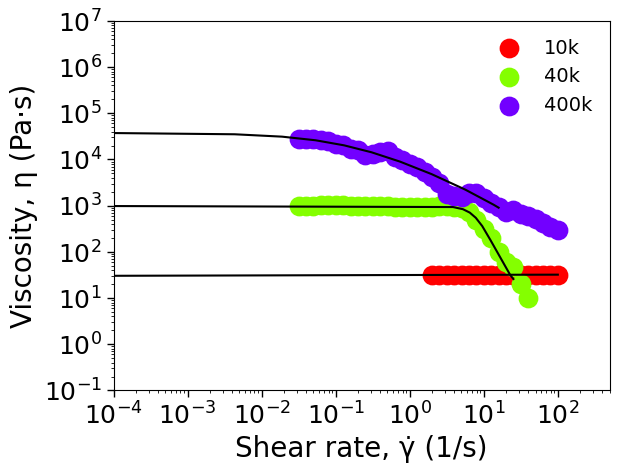

     MW         eta_o
0   10k     30.308168
1   40k    979.753478
2  400k  37409.972628


In [130]:
def eta(gdot, eta_0, eta_inf, lamb, n):
    with np.errstate(invalid='ignore'):  # Ignore invalid values encountered in power operation
        return eta_inf + ((eta_0 - eta_inf) / (1 + (lamb * gdot) ** n))
P2VP_10k_shear_x = np.array(P2VP_10k_shear)
P2VP_10k_vis_x = np.array(P2VP_10k_vis)
P2VP_10k_shear_flat = np.ravel(P2VP_10k_shear_x)
P2VP_10k_vis_flat = np.ravel(P2VP_10k_vis_x)

P2VP_40k_shear_x = np.array(P2VP_40k_shear_3)
P2VP_40k_vis_x = np.array(P2VP_40k_vis_3)
P2VP_40k_shear_flat = np.ravel(P2VP_40k_shear_x)
P2VP_40k_vis_flat = np.ravel(P2VP_40k_vis_x)

P2VP_250k_shear_x = np.array(P2VP_250k_shear)
P2VP_250k_vis_x = np.array(P2VP_250k_vis)
P2VP_250k_shear_flat = np.ravel(P2VP_250k_shear_x)
P2VP_250k_vis_flat = np.ravel(P2VP_250k_vis_x)

P2VP_400k_shear_x = np.array(P2VP_400k_shear)
P2VP_400k_vis_x = np.array(P2VP_400k_vis)
P2VP_400k_shear_flat = np.ravel(P2VP_400k_shear_x)
P2VP_400k_vis_flat = np.ravel(P2VP_400k_vis_x)

P2VP_1p2M_shear_x = np.array(P2VP_1p2M_shear)
P2VP_1p2M_vis_x = np.array(P2VP_1p2M_vis)
P2VP_1p2M_shear_flat = np.ravel(P2VP_1p2M_shear_x)
P2VP_1p2M_vis_flat = np.ravel(P2VP_1p2M_vis_x)

p0 = [30, 10, 1, 1]

params_P2VP_10k, cov_P2VP_10k = curve_fit(eta, P2VP_10k_shear_flat, P2VP_10k_vis_flat, p0, maxfev=100000)
eta_0_fit_P2VP_10k, eta_inf_fit_P2VP_10k, lamb_fit_P2VP_10k, n_fit_P2VP_10k = params_P2VP_10k

shear_fit_P2VP_10k = np.logspace(-4, 2, 1000)
vis_fit_P2VP_10k = eta(shear_fit_P2VP_10k, eta_0_fit_P2VP_10k, eta_inf_fit_P2VP_10k, lamb_fit_P2VP_10k, n_fit_P2VP_10k)

params_P2VP_40k, cov_P2VP_40k = curve_fit(eta, P2VP_40k_shear_flat, P2VP_40k_vis_flat, p0, maxfev=100000)
eta_0_fit_P2VP_40k, eta_inf_fit_P2VP_40k, lamb_fit_P2VP_40k, n_fit_P2VP_40k = params_P2VP_40k

shear_fit_P2VP_40k = np.logspace(-4, 1.4, 1000)
vis_fit_P2VP_40k = eta(shear_fit_P2VP_40k, eta_0_fit_P2VP_40k, eta_inf_fit_P2VP_40k, lamb_fit_P2VP_40k, n_fit_P2VP_40k)

params_P2VP_250k, cov_P2VP_250k = curve_fit(eta, P2VP_250k_shear_flat, P2VP_250k_vis_flat, p0, maxfev=100000)
eta_0_fit_P2VP_250k, eta_inf_fit_P2VP_250k, lamb_fit_P2VP_250k, n_fit_P2VP_250k = params_P2VP_250k

shear_fit_P2VP_250k = np.logspace(-4, 2, 1000)
vis_fit_P2VP_250k = eta(shear_fit_P2VP_250k, eta_0_fit_P2VP_250k, eta_inf_fit_P2VP_250k, lamb_fit_P2VP_250k, n_fit_P2VP_250k)

params_P2VP_400k, cov_P2VP_400k = curve_fit(eta, P2VP_400k_shear_flat, P2VP_400k_vis_flat, p0, maxfev=100000)
eta_0_fit_P2VP_400k, eta_inf_fit_P2VP_400k, lamb_fit_P2VP_400k, n_fit_P2VP_400k = params_P2VP_400k

shear_fit_P2VP_400k = np.logspace(-4, 1.2, 1000)
vis_fit_P2VP_400k = eta(shear_fit_P2VP_400k, eta_0_fit_P2VP_400k, eta_inf_fit_P2VP_400k, lamb_fit_P2VP_400k, n_fit_P2VP_400k)

params_P2VP_1p2M, cov_P2VP_1p2M = curve_fit(eta, P2VP_1p2M_shear_flat, P2VP_1p2M_vis_flat, p0, maxfev=100000)
eta_0_fit_P2VP_1p2M, eta_inf_fit_P2VP_1p2M, lamb_fit_P2VP_1p2M, n_fit_P2VP_1p2M = params_P2VP_1p2M

shear_fit_P2VP_1p2M = np.logspace(-4, 2, 1000)
vis_fit_P2VP_1p2M = eta(shear_fit_P2VP_1p2M, eta_0_fit_P2VP_1p2M, eta_inf_fit_P2VP_1p2M, lamb_fit_P2VP_1p2M, n_fit_P2VP_1p2M)

shear_fit_P2VP_2 = [shear_fit_P2VP_10k, shear_fit_P2VP_40k, shear_fit_P2VP_250k, shear_fit_P2VP_400k]
vis_fit_P2VP_2 = [vis_fit_P2VP_10k, vis_fit_P2VP_40k, vis_fit_P2VP_250k, vis_fit_P2VP_400k]

cmap = plt.cm.get_cmap('hsv') 
for idx, (x1, y1, x2, y2, label) in enumerate(zip(shear_rate_P2VP_2, viscosity_P2VP_2, shear_fit_P2VP_2, vis_fit_P2VP_2, label_name_P2VP_2)):
    c = cmap(idx / len(shear_rate_P2VP_2))
    if idx != 2 and idx != 4:
        scatter1 = plt.scatter(x1, y1, c=np.atleast_2d(c), s=150,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label)
        fitdata = plt.loglog(x2, y2, 'k-')

plt.style.use('fast')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear rate, γ̇ (1/s)", fontsize=20)
plt.ylabel("Viscosity, \u03B7 (Pa\u00B7s)", fontsize=20)  


plt.legend(frameon = False, fontsize = 14)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.0001, 500)
plt.ylim(0.1, 10000000)
#plt.savefig("Flow behaviors of P2VP 2.png", dpi=1500, bbox_inches='tight')
plt.show()
label_name_P2VP_3 = ['10k', '40k', '400k']
eta_fit_P2VP_2 = [eta_0_fit_P2VP_10k, eta_0_fit_P2VP_40k, eta_0_fit_P2VP_400k]
data = {
    'MW': label_name_P2VP_3,
    'eta_o': eta_fit_P2VP_2
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
print(df)